# 2022 NZMSA Data Science Submission.

In [1]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline

# Exploratory Data Analysis.

In [2]:
dataset = pd.read_csv("weather-data.csv")
dataset.head() # Show the first five results.

,station,valid,tmpc,dwpc,relh,sknt,gust,peak_wind_drct
0,NZAA,2015-01-01 00:00,21.0,11.0,52.77,15.0,NaN,NaN
1,NZAA,2015-01-01 00:30,21.0,10.0,49.37,16.0,NaN,NaN
2,NZAA,2015-01-01 01:00,21.0,12.0,56.38,16.0,NaN,NaN
3,NZAA,2015-01-01 01:30,21.0,13.0,60.21,16.0,NaN,NaN
4,NZAA,2015-01-01 02:00,21.0,12.0,56.38,16.0,NaN,NaN


In [3]:
dataset.describe()

,tmpc,dwpc,relh,sknt,gust,peak_wind_drct
count,103678.000000,103678.000000,103593.000000,103704.000000,1203.000000,0.0
mean,15.811503,12.115772,79.782307,8.919029,30.962594,NaN
std,4.235197,3.738005,12.562199,5.348379,6.319510,NaN
min,2.000000,-2.000000,29.230000,0.000000,13.000000,NaN
25%,13.000000,9.000000,71.450000,5.000000,27.000000,NaN
50%,16.000000,12.000000,81.990000,8.000000,31.000000,NaN
75%,19.000000,15.000000,88.180000,12.000000,35.000000,NaN
max,29.000000,23.000000,100.000000,42.000000,56.000000,NaN


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103713 entries, 0 to 103712
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0    station        103713 non-null  object 
 1   valid           103713 non-null  object 
 2   tmpc            103678 non-null  float64
 3   dwpc            103678 non-null  float64
 4   relh            103593 non-null  float64
 5   sknt            103704 non-null  float64
 6   gust            1203 non-null    float64
 7   peak_wind_drct  0 non-null       float64
dtypes: float64(6), object(2)
memory usage: 6.3+ MB


In [5]:
for name in dataset.columns[2:-1]:
    print(f"Column {name}")
    print(f"\tAverage: {dataset[name].mean()}")
    print(f"\tStandard Deviation: {dataset[name].std()}")
    print(f"\t10th and 90th percentile range: {dataset[name].quantile(q=0.9) - dataset[name].quantile(q=0.1)}")
    print(f"\t25th and 75th percentile range: {dataset[name].quantile(q=0.75) - dataset[name].quantile(q=0.25)}")

Column tmpc
	Average: 15.81150292251008
	Standard Deviation: 4.235196864334063
	10th and 90th percentile range: 10.0
	25th and 75th percentile range: 6.0
Column dwpc
	Average: 12.115771909180348
	Standard Deviation: 3.7380046159633107
	10th and 90th percentile range: 10.0
	25th and 75th percentile range: 6.0
Column relh
	Average: 79.78230729877448
	Standard Deviation: 12.562199242948282
	10th and 90th percentile range: 31.14
	25th and 75th percentile range: 16.730000000000004
Column sknt
	Average: 8.919029159916686
	Standard Deviation: 5.34837935634243
	10th and 90th percentile range: 13.0
	25th and 75th percentile range: 7.0
Column gust
	Average: 30.962593516209477
	Standard Deviation: 6.319509758218397
	10th and 90th percentile range: 15.0
	25th and 75th percentile range: 8.0


<AxesSubplot:>

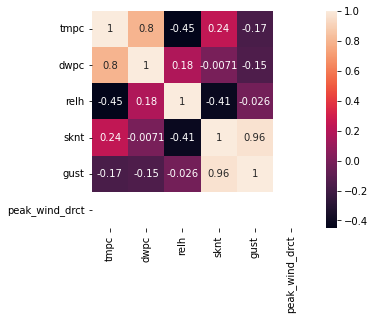

In [6]:
sns.heatmap(dataset.corr(), annot=True, square=True)

/var/folders/36/slw7j0hd47q8_r89sl14vw1m0000gn/T/ipykernel_25059/139544169.py:31: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


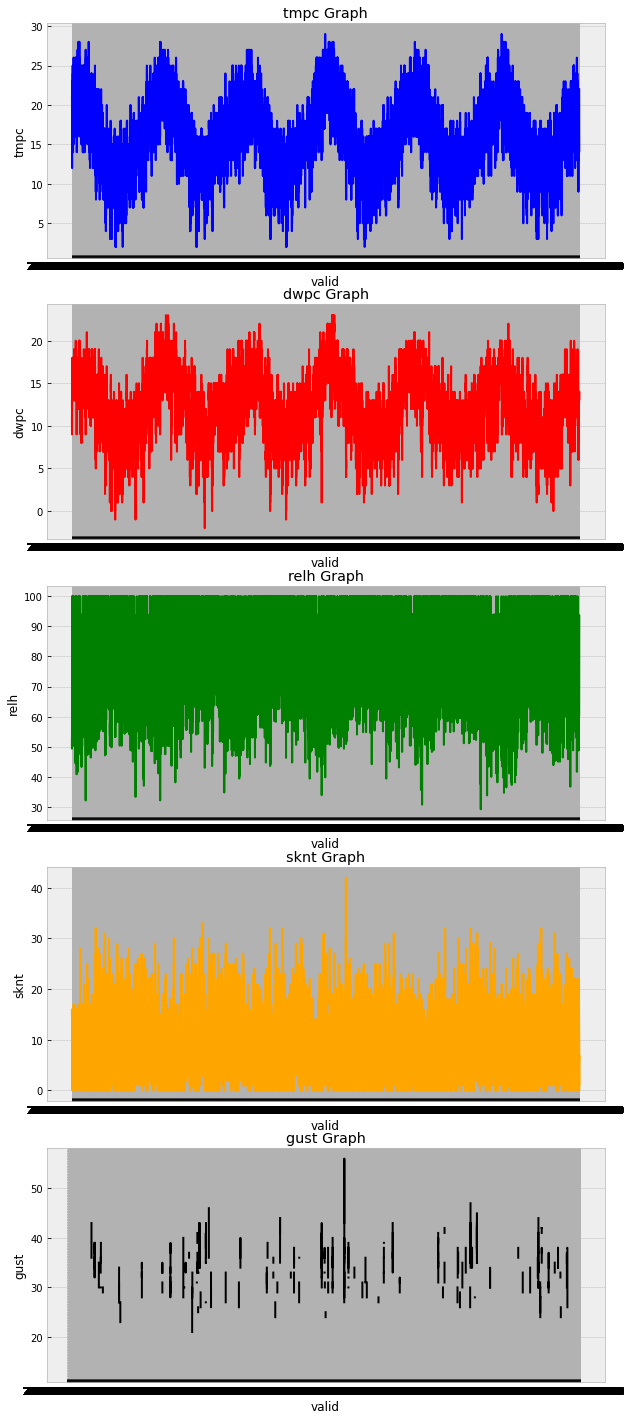

In [7]:

plt.style.use("bmh")
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=5, ncols=1, squeeze=True)

ax1.plot(dataset["valid"], dataset["tmpc"], color="blue")
ax1.set_title("tmpc Graph")
ax1.set_xlabel("valid")
ax1.set_ylabel("tmpc")

ax2.plot(dataset["valid"], dataset["dwpc"], color="red")
ax2.set_title("dwpc Graph")
ax2.set_xlabel("valid")
ax2.set_ylabel("dwpc")

ax3.plot(dataset["valid"], dataset["relh"], color="green")
ax3.set_title("relh Graph")
ax3.set_xlabel("valid")
ax3.set_ylabel("relh")

ax4.plot(dataset["valid"], dataset["sknt"], color="orange")
ax4.set_title("sknt Graph")
ax4.set_xlabel("valid")
ax4.set_ylabel("sknt")

ax5.plot(dataset["valid"], dataset["gust"], color="black")
ax5.set_title("gust Graph")
ax5.set_xlabel("valid")
ax5.set_ylabel("gust")

fig.set_size_inches(10,25)

fig.show()

In [8]:
dataset[" station"].value_counts()

NZAA    103713
Name:  station, dtype: int64

### Reflection

Columns of gust and peak_wind_drct do not have enough values, and they have been removed.  Temperature of the environment in celsius and temperature of the dew point in the environment in celsius are correlated with 80 percent confidence.

# Data Processing

In [19]:
# An exhaustive list of what you can do with Pandas dataframe is in this link: https://pandas.pydata.org/docs/reference/frame.html
dataset = pd.read_csv("weather-data.csv")
dataset.drop(columns=[" station", "peak_wind_drct", "gust"], inplace=True)
dataset = dataset.dropna(axis=0, how="any")
dataset.head()

,valid,tmpc,dwpc,relh,sknt
0,2015-01-01 00:00,21.0,11.0,52.77,15.0
1,2015-01-01 00:30,21.0,10.0,49.37,16.0
2,2015-01-01 01:00,21.0,12.0,56.38,16.0
3,2015-01-01 01:30,21.0,13.0,60.21,16.0
4,2015-01-01 02:00,21.0,12.0,56.38,16.0


In [20]:
from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(pd.to_datetime(dataset["valid"]), (dataset["tmpc"] - dataset["tmpc"].mean()) / dataset["tmpc"].std(), test_size=0.2)

# Data Modelling

In [ ]:
# An exhaustive list of models can be found in sci-kit learn in this link: https://scikit-learn.org/stable/supervised_learning.html
# The url takes you to supervised learning which is what you will be dealing with for this phase.

pip install prophet



In [22]:
from prophet import Prophet
model = Prophet()
model.fit(pd.DataFrame(data={"ds": trainX, "y":trainY}))

23:59:00 - cmdstanpy - INFO - Chain [1] start processing
23:59:29 - cmdstanpy - INFO - Chain [1] done processing


In [23]:
testDataOrdered = pd.DataFrame(data={"ds" : testX, "y": testY}).sort_values(by="ds")
forecast_Y = model.predict(testDataOrdered)
forecast_Y.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-01 00:30:00,0.067963,0.702123,1.892544,0.067963,0.067963,1.252064,1.252064,1.252064,0.600866,...,-0.010199,-0.010199,-0.010199,0.661397,0.661397,0.661397,0.0,0.0,0.0,1.320027
1,2015-01-01 01:00:00,0.067941,0.735071,1.973532,0.067941,0.067941,1.281728,1.281728,1.281728,0.629692,...,-0.009715,-0.009715,-0.009715,0.661751,0.661751,0.661751,0.0,0.0,0.0,1.349669
2,2015-01-01 04:00:00,0.067807,0.603314,1.884740,0.067807,0.067807,1.201132,1.201132,1.201132,0.544517,...,-0.007294,-0.007294,-0.007294,0.663909,0.663909,0.663909,0.0,0.0,0.0,1.268938
3,2015-01-01 04:30:00,0.067784,0.595059,1.836172,0.067784,0.067784,1.130911,1.130911,1.130911,0.473618,...,-0.006981,-0.006981,-0.006981,0.664274,0.664274,0.664274,0.0,0.0,0.0,1.198695
4,2015-01-01 05:00:00,0.067762,0.483369,1.712227,0.067762,0.067762,1.047362,1.047362,1.047362,0.389417,...,-0.006696,-0.006696,-0.006696,0.664641,0.664641,0.664641,0.0,0.0,0.0,1.115125


In [24]:
import numpy as np
def calculate_Accuracy(test, true):
    sum = 0
    count = 0
    for (test_Value, true_Value) in zip(test, true):
        sum += abs(test_Value - true_Value) /true_Value
        count+=1
    return sum/count

calculate_Accuracy(forecast_Y["yhat"], testDataOrdered["y"])


0.587838096730139

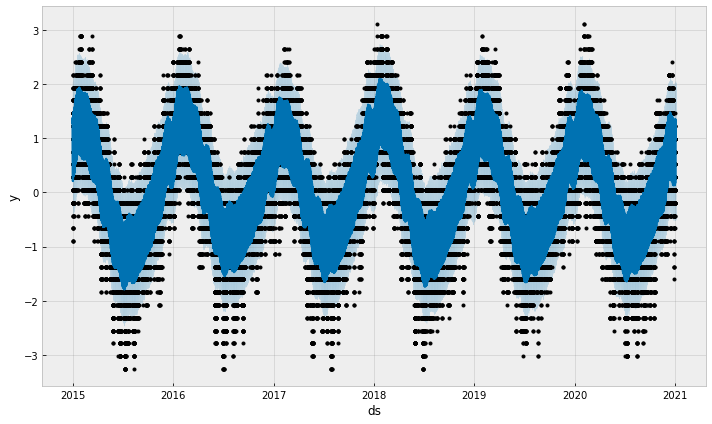

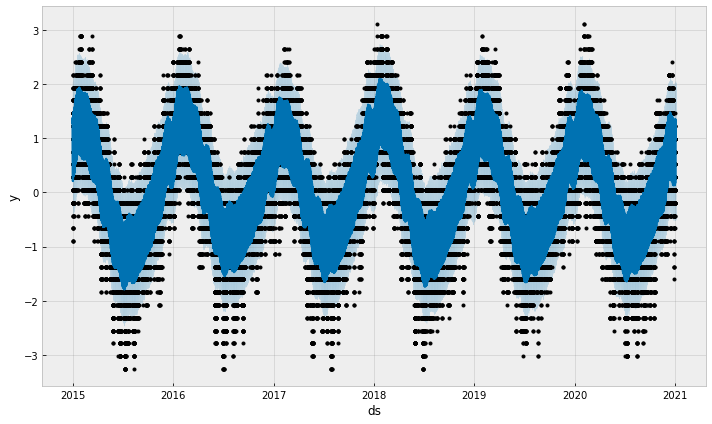

In [25]:
future_Month_Forcast = model.predict(model.make_future_dataframe(periods=60*30, freq='min'))
model.plot(future_Month_Forcast)

# Conclusion

* Comment on your model performance.
* Anything interesting about the data analysis.

The accuracy of the overall performance is 56%.
It takes time as the input and predict the tempratures.